In [69]:
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [70]:
df = pd.read_csv('train.csv')
print(df.shape)

(1458644, 11)


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [72]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [73]:
df['trip_duration_min'] = df.trip_duration/60

In [74]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, format='%Y-%m-%d', errors='ignore')
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime, format='%Y-%m-%d', errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 12 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_duration_min     1458644 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(3), object(2)
memory usage: 133.5+ MB


In [75]:
df['day_of_week'] = pd.DatetimeIndex(df.pickup_datetime).dayofweek + 1
df['pickup_hour'] = pd.DatetimeIndex(df.pickup_datetime).hour
df['month'] = pd.DatetimeIndex(df.pickup_datetime).month

In [76]:
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [77]:
df['distance'] = haversine_np(df.pickup_longitude, df.pickup_latitude, df.dropoff_longitude, df.dropoff_latitude)

In [78]:
df.head(30)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration_min,day_of_week,pickup_hour,month,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,7.583333,1,17,3,1.497580
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,11.050000,7,0,6,1.804374
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,35.400000,2,11,1,6.381090
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,7.150000,3,19,4,1.484566
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,7.250000,6,13,3,1.187842
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443,7.383333,6,22,1,1.098252
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341,5.683333,5,22,6,1.325446
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551,25.850000,6,7,5,5.711393
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255,4.250000,5,23,5,1.309531
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,20.416667,4,21,3,5.117946


# Графики

№1. Строим гистограмму matplotlib по времени поездки в минутах.
Цель гистограммы - показать распределение длительностей поездок.
По гистограмме видно одну моду, т.е. самую частую длительность поездки (около 10 мин). В целях наглядного представления на гистограмме не выведены данные по поездкам, превышающим по длительности 100мин

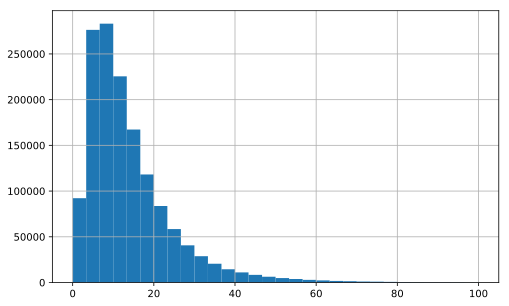

In [79]:
df.trip_duration_min.hist(range=(0, 100), bins=30)

№2. Строим box plot (seaborn), отображающий распределение длительностей поездок в зависимости от дня недели. На графике видно, что средняя длительность поездки практически не меняется в течение недели, несущественно вырастая к середине недели

In [80]:
filtered_df = df[(df.trip_duration_min <= 40)]

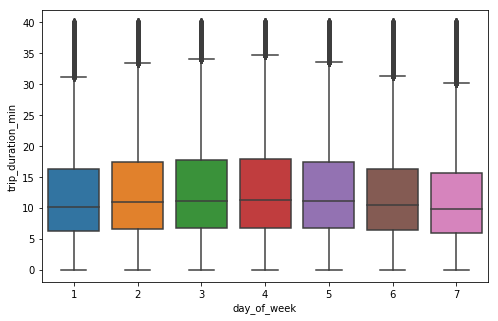

In [81]:
%config InlineBackend.figure_format = 'png'
sns.boxplot(x="day_of_week", y="trip_duration_min", 
            data=filtered_df)

№3. Строим хитмэп (seaborn) количества вызовов такси в зависимости от дня недели и часа. Из графика видно, что в будние дни такси пользуется повышенным спросом в утренние часы (все едут на работу) и в вечерние (с работы). Ближе к выходным (а у кого-то и с четверга) востребованность такси сдвигается на ночные часы

In [82]:
hour_of_day_of_week = df.pivot_table(
                        index='pickup_hour', 
                        columns='day_of_week', 
                        values='id', 
                        aggfunc='count').fillna(0).applymap(int)

hour_of_day_of_week

day_of_week,1,2,3,4,5,6,7
pickup_hour,,,,,,,
0,4299,4506,5327,6299,8779,11768,12270
1,2578,2574,3134,3632,5804,9989,10860
2,1658,1508,1890,2145,3949,8240,8582
3,1226,1012,1280,1550,2924,6037,6866
4,1351,1142,1252,1385,2313,3849,4500
5,2147,2126,2087,2222,2461,1997,1962
6,5357,5779,5833,6051,5544,2535,2149
7,8620,10050,10344,10408,9607,3727,2844
8,10342,11608,11889,11936,11465,5480,4333


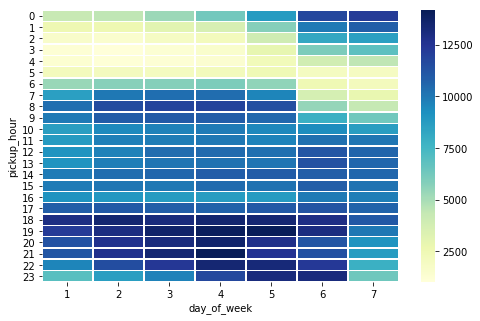

In [83]:
sns.heatmap(hour_of_day_of_week, cmap="YlGnBu",
            linewidths=.5)

№4. График, с которого надо было бы начать - pairplot (seaborn), показывает взаимозависимость фичей друг от друга. Здесь, для примера выведены взаимозависимости времени поездки, дистанции и часа начала поездки. Не удивительно, что с увеличением дистанции растет время. Еще можно отметить, что в утреннее время (около 5 утра) поездки занимают меньшее время, что, скорее всего связано с низкой загруженностью дорог

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 16 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null datetime64[ns]
dropoff_datetime      1458644 non-null datetime64[ns]
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
trip_duration_min     1458644 non-null float64
day_of_week           1458644 non-null int64
pickup_hour           1458644 non-null int64
month                 1458644 non-null int64
distance              1458644 non-null float64
dtypes: datetime64[ns](2), float64(6), int64(6), object(2)
memory usage: 178.1+ MB


In [85]:
df_sample = df[(df.trip_duration_min <= 60) & (df.distance <= 100)].sample(frac=0.1).reset_index(drop=True)
df_sample.shape

(144631, 16)

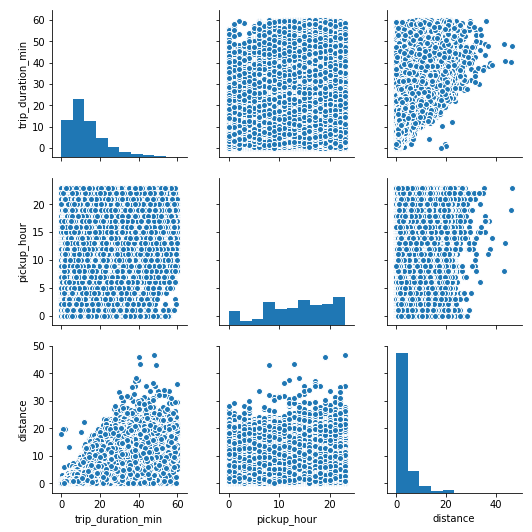

In [86]:
%config InlineBackend.figure_format = 'png'
sns_plot = sns.pairplot(
    df_sample[['trip_duration_min', 'pickup_hour', 'distance']]);

№5. Строим интерактивные графики в plotly , отображающие динамику помесячной доли заказов и помесячного накатанного расстояния внутри периода с января по июнь 2016 года (6 месяцев). 

In [87]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [88]:
df_month_count = df[['month'] + ['id']].groupby(['month']).count()
df_month_count

,id
month,
1,229707
2,238300
3,256189
4,251645
5,248487
6,234316


In [89]:
df_month_distance = df[['month'] + ['distance']].groupby(['month']).sum()
df_month_distance

,distance
month,
1,775305.893966
2,792308.589883
3,878354.278400
4,863784.328589
5,881903.203778
6,824188.040039


In [90]:
df_vid = df_month_count.join(df_month_distance)
df_vid

,id,distance
month,,
1,229707,775305.893966
2,238300,792308.589883
3,256189,878354.278400
4,251645,863784.328589
5,248487,881903.203778
6,234316,824188.040039


In [91]:
df_vid['id'] = df_vid['id'].apply(lambda x: 100*x/df_vid['id'].sum())
df_vid

,id,distance
month,,
1,15.747982,775305.893966
2,16.337091,792308.589883
3,17.563504,878354.278400
4,17.251982,863784.328589
5,17.035480,881903.203778
6,16.063961,824188.040039


In [92]:
df_vid['distance'] = df_vid['distance'].apply(lambda x: 100*x/df_vid['distance'].sum())
df_vid

,id,distance
month,,
1,15.747982,15.457136
2,16.337091,15.796116
3,17.563504,17.511594
4,17.251982,17.221115
5,17.035480,17.582348
6,16.063961,16.431691


In [93]:
df_vid.columns = ['Monthly share of orders', 'Monthly share of distance']

In [94]:
trace0 = go.Scatter(
    x=df_vid.index,
    y=df_vid['Monthly share of orders'],
    name='% of six-months quantity of orders'
)

trace1 = go.Scatter(
    x=df_vid.index,
    y=df_vid['Monthly share of distance'],
    name='% of six-months total distance'
)

data = [trace0, trace1]
layout = {'title': '% of orders and distance for six months of 2016'}

fig = go.Figure(data=data, layout=layout)

iplot(fig)